In [8]:
import pandas as pd

# Load datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

# Display dataset samples
print(customers.head())
print(products.head())
print(transactions.head())


  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [9]:
# Check for null values in each dataset
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())


CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [13]:
# Check data types and summary statistics
print(customers.info())
print(products.info())
print(transactions.info())

# Describe numerical columns
print(transactions.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

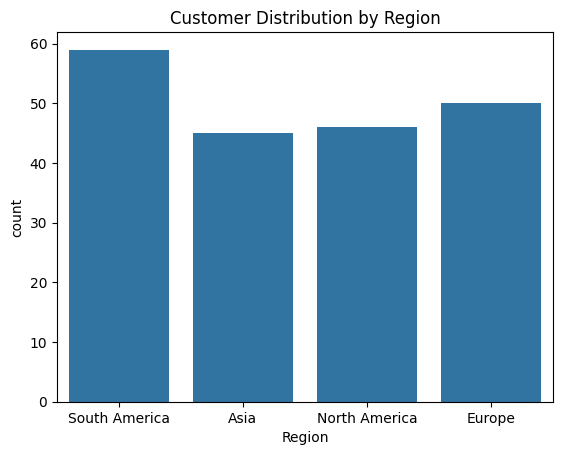

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=customers, x="Region")
plt.title("Customer Distribution by Region")
plt.show()


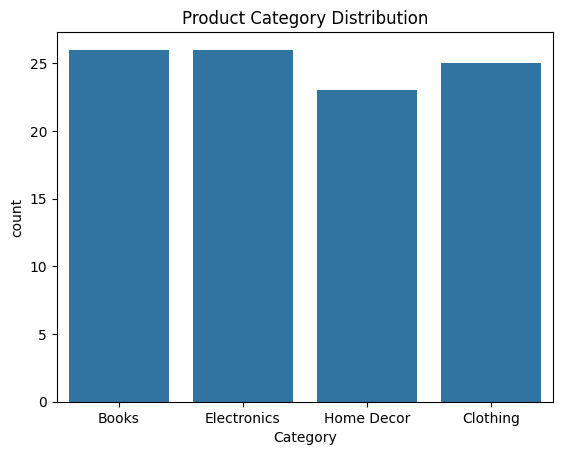

In [22]:
sns.countplot(data=products, x="Category")
plt.title("Product Category Distribution")
plt.show()


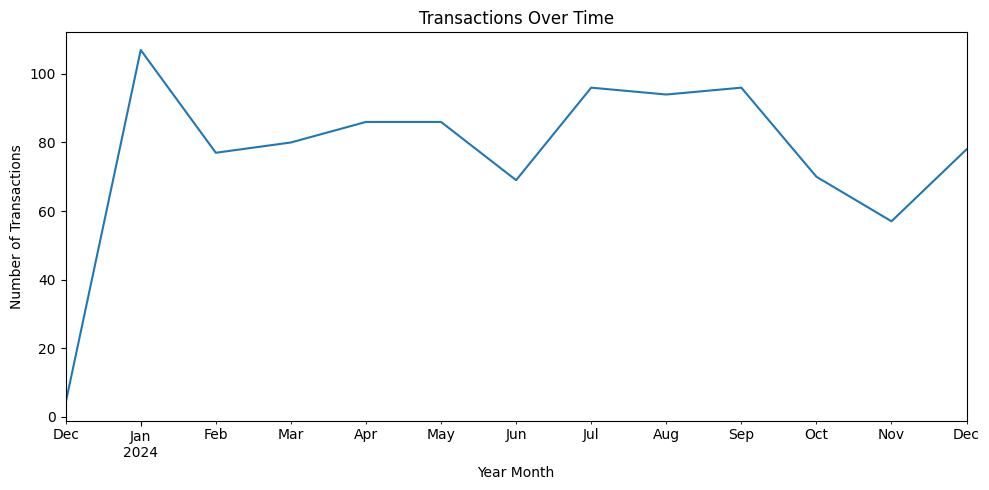

In [29]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

transactions['YearMonth'] = transactions['TransactionDate'].dt.to_period('M')

transactions_per_month = transactions.groupby('YearMonth').size()

transactions_per_month.plot(kind='line', figsize=(10, 5), title='Transactions Over Time')

plt.ylabel("Number of Transactions")
plt.xlabel("Year Month")
plt.tight_layout()
plt.show()


In [17]:
merged_data = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")

print(merged_data.head())


  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue  Price_x YearMonth     CustomerName         Region  SignupDate  \
0      300.68   300.68   2024-08   Andrea Jenkins         Europe  2022-12-03   
1      300.68   300.68   2024-05  Brittany Harvey           Asia  2024-09-04   
2      300.68   300.68   2024-04  Kathryn Stevens         Europe  2024-04-04   
3      601.36   300.68   2024-03  Travis Campbell  South America  2024-04-11   
4      902.04   300.68   2024-03    Timothy Perez         Europe  2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Ele